# Алгоритмы классификации (продолжение)

### Метод Решающий лес

In [1]:
# применить решающий лес
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от числа деревьев (n_estimators). 
# Что означают и как влияют параметры criterion, max_depth, min_samples_split, min_samples_leaf ?

In [2]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

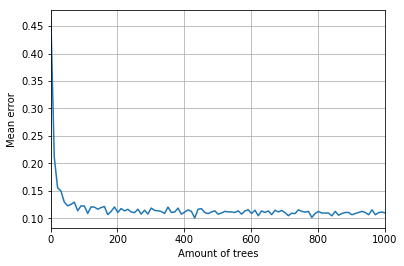

In [4]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as RFC

amount_of_trees = []
for i in range(1, 1002, 10):
    score = cvs(RFC(n_estimators=i), X, y, cv=10)
    amount_of_trees.append(1 - score.mean())

plt.xlim([0, 1001])
plt.plot([i for i in range(1, 1002, 10)], amount_of_trees)
plt.ylabel('Mean error')
plt.xlabel('Amount of trees')
plt.grid()
plt.show()

* __criterion__ -- имеет два параметра: "gini" -- квадратичная метрика; "entropy" -- логарифмическая метрика. Первая, в отличие от второй, ускоряет вычисления (т.к. нет логарифма).
* __max_depth__ -- глубина дерева. Из экспериментов получилось, что для оптимальных значений глубина должна быть средней, т.к. с её ростом значительно ухудшается оценка.
* __min_samples_split__ -- устанавливает минимальное количество образцов (данных), которое должно находиться в одном из двух выходов каждого узла дерева.
* __min_samples_leaf__ -- устанавливает минимальное количество образцов (данных) на каждый лист дерева (то есть на самый низ).

### Метод Бустинг

In [ ]:
# применить бустинг
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# какие параметры и как влияют на качество классификации?

In [1]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import GradientBoostingClassifier as GBC

train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

In [2]:
score = cvs(GBC(), X, y, cv=10)

In [3]:
print("error =", 1 - score.mean())

error = 0.144828853852


* __n_estimators__ -- количество этапов для использования метода оценки. Лучшая оценка достигается увеличением числа этапов.
* __max_depth__ -- ограничивает количество узлов дерева: улучшает оценку при оптимальном значении (зависит от ввода).
* __criterion__ -- устанавливает метрику, отвечающую за качество разбиения. “friedman_mse” является наиболее оптимальным вариантом и стоит по дефолту.
* __min_samples_split__ и __min_samples_leaf__ -- аналогично деревьям влияют на качество оценки.

In [3]:
# Сделайте выводы о лучшем методе, среди рассмотренных на занятии 2 и 3.

Анализируя минимальную ошибку среди всех рассмотренных методов, самый точный результат выдаёт решающий лес (~0.103).

# Работа с бинарными изображениями
## с помощью библиотеки http://scikit-image.org

In [4]:
# бинаризовать изображения, привести примеры картинок
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html

In [110]:
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_mean

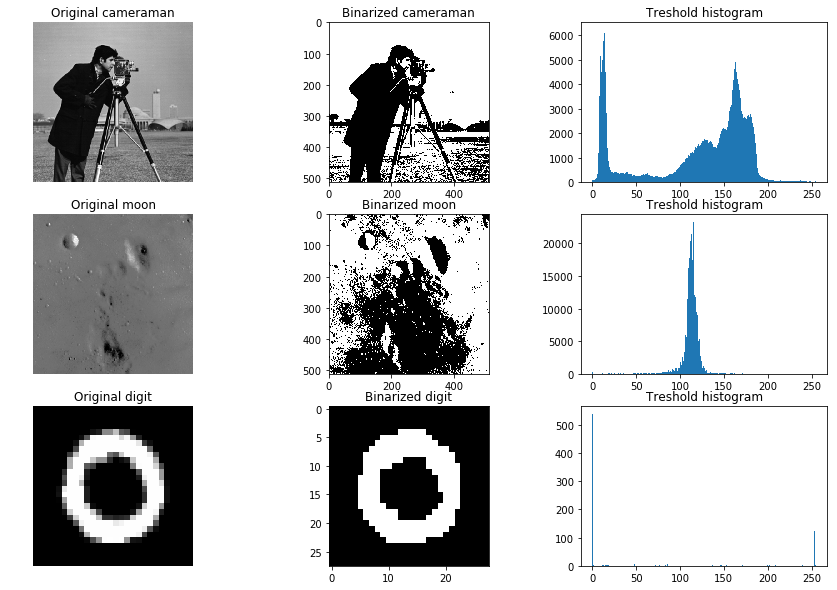

In [111]:
image_1 = data.camera()
threshold_1 = threshold_mean(image_1)
binary_image_1 = image_1 > threshold_1

image_2 = data.moon()
threshold_2 = threshold_mean(image_2)
binary_image_2 = image_2 > threshold_2

image_3 = X[1].reshape(28, 28)
threshold_3 = threshold_mean(image_3)
binary_image_3 = image_3 > threshold_3

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ax[0, 0].imshow(image_1, cmap=plt.cm.gray)
ax[0, 0].set_title('Original cameraman')
ax[0, 1].imshow(binary_image_1, cmap=plt.cm.gray)
ax[0, 1].set_title('Binarized cameraman')
ax[0, 2].hist(image_1.ravel(), bins=256)
ax[0, 2].set_title('Treshold histogram')

ax[1, 0].imshow(image_2, cmap=plt.cm.gray)
ax[1, 0].set_title('Original moon')
ax[1, 1].imshow(binary_image_2, cmap=plt.cm.gray)
ax[1, 1].set_title('Binarized moon')
ax[1, 2].hist(image_2.ravel(), bins=256)
ax[1, 2].set_title('Treshold histogram')

ax[2, 0].imshow(image_3, cmap=plt.cm.gray)
ax[2, 0].set_title('Original digit')
ax[2, 1].imshow(binary_image_3, cmap=plt.cm.gray)
ax[2, 1].set_title('Binarized digit')
ax[2, 2].hist(image_3.ravel(), bins=256)
ax[2, 2].set_title('Treshold histogram')

for a in ax[:, 0]:
    a.axis('off')

plt.show()

In [15]:
# выбрать несколько типичных изображений цифр и несколько не типичных (разомнутую 6, не связные из-за шума и т.п.)
# применить к ним замыкание и размыкание в разных вариантах и порядке
# выбрать наилучший вариант визуально, применить его ко всей выборке
# http://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from skimage.morphology import binary_opening
from skimage.morphology import binary_closing
from skimage.filters import threshold_mean

train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

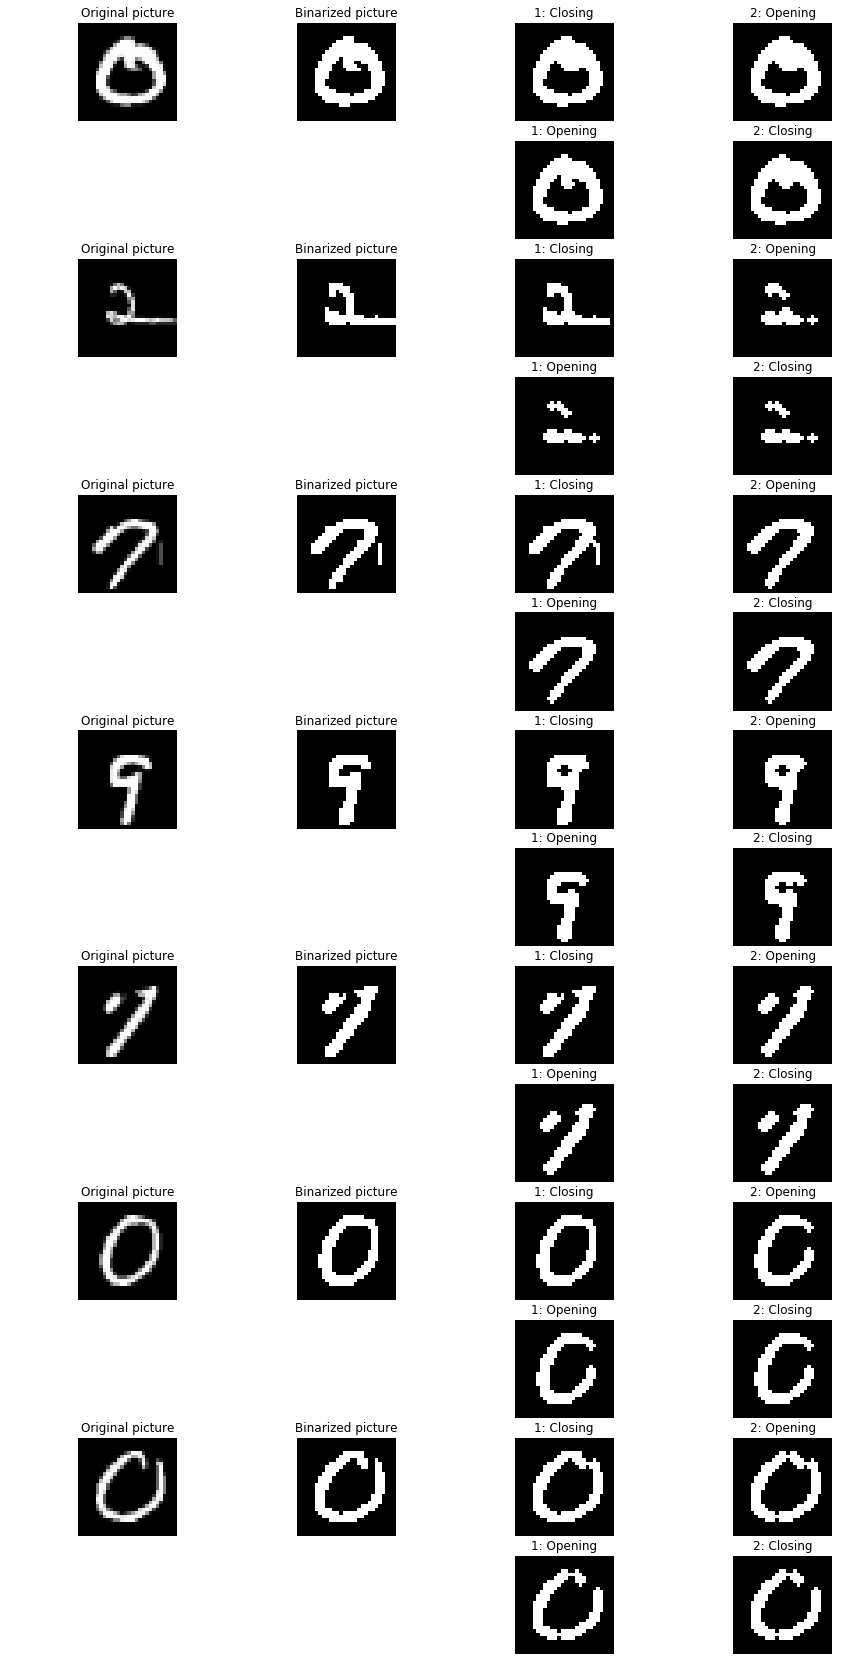

In [2]:
candidates = [23, 55, 102, 210, 242, 276, 285]
digits = [np.reshape(X[i], (28, 28)) > threshold_mean(np.reshape(X[i], (28, 28))) for i in candidates]
fig, ax = plt.subplots(nrows=len(digits) * 2, ncols=4, figsize=(15, 30))

for i in range(len(digits)):
    ax[i * 2, 0].set_title('Original picture')
    ax[i * 2, 0].imshow(np.reshape(X[candidates[i]], (28, 28)), cmap=plt.cm.gray)
    ax[i * 2, 1].set_title('Binarized picture')
    ax[i * 2, 1].imshow(digits[i], cmap=plt.cm.gray)
    im_closed = binary_closing(digits[i])
    ax[i * 2, 2].set_title('1: Closing')
    ax[i * 2, 2].imshow(im_closed, cmap=plt.cm.gray)
    ax[i * 2, 3].set_title('2: Opening')
    ax[i * 2, 3].imshow(binary_opening(im_closed), cmap=plt.cm.gray)
    im_opened = binary_opening(digits[i])
    ax[i * 2 + 1, 2].set_title('1: Opening')
    ax[i * 2 + 1, 2].imshow(im_opened, cmap=plt.cm.gray)
    ax[i * 2 + 1, 3].set_title('2: Closing')
    ax[i * 2 + 1, 3].imshow(binary_closing(im_opened), cmap=plt.cm.gray)

for a in ax:
    for b in a:
        b.axis('off')

plt.show()

Визуально результат получается подходящим, если к изображению цифры применить только замыкание, т.к. например если цифра написана корректно, то последовательность смыканий-размыканий её в конечном итоге разомкнёт.

In [3]:
digits = [np.reshape(X[i], (28, 28)) > threshold_mean(np.reshape(X[i], (28, 28))) for i in range(X[:1000].shape[0])]
for i in range(len(digits)):
    im_closed = binary_closing(digits[i])

In [4]:
# построить скелеты изображений
# визуально выбрать лучшие параметры (skeletonize, medial_axis)
# нарисовать примеры результатов

In [5]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from skimage.morphology import skeletonize
from skimage.morphology import medial_axis

train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

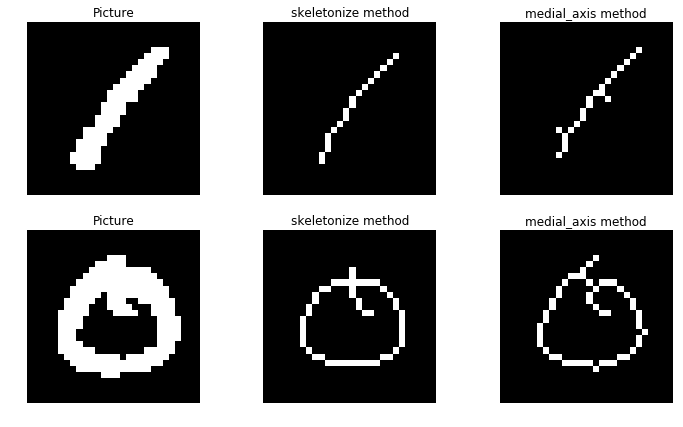

In [6]:
candidates = [0, 23]
digits = [np.reshape(X[i], (28, 28)) > threshold_mean(np.reshape(X[i], (28, 28))) for i in candidates]
fig, ax = plt.subplots(nrows=len(digits), ncols=3, figsize=(12, 7))

for i in range(len(digits)):
    ax[i, 0].set_title('Picture')
    ax[i, 0].imshow(digits[i], cmap=plt.cm.gray)
    ax[i, 1].set_title('skeletonize method')
    ax[i, 1].imshow(skeletonize(digits[i]), cmap=plt.cm.gray)
    ax[i, 2].set_title('medial_axis method')
    ax[i, 2].imshow(medial_axis(digits[i]), cmap=plt.cm.gray)

for a in ax:
    for b in a:
        b.axis('off')

plt.show()

In [7]:
digits = [np.reshape(X[i], (28, 28)) > threshold_mean(np.reshape(X[i], (28, 28))) for i in range(X[:1000].shape[0])]
for i in range(len(digits)):
    im_closed = binary_closing(digits[i])

In [8]:
# сгенерировать признаки по изображениям и их склетам (площадь, запас связности, ширина и т.д.)

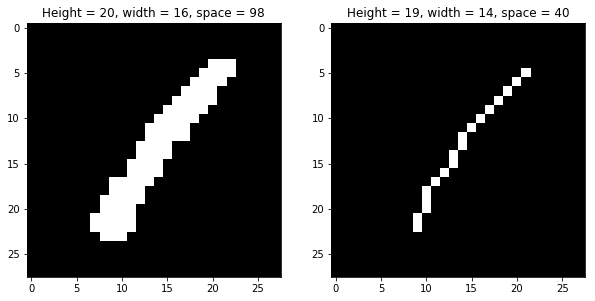

In [9]:
closed_data = digits
skeletonized_closed_data = np.array(list(map(lambda x: skeletonize(x), digits)))

def calc_height(vec):
    img = np.array(vec).reshape(28, 28)
    empty_lines = 0
    for line in img:
        if (sum(line) == 0):
            empty_lines += 1
    return (28 - empty_lines)

def calc_width(vec):
    return (calc_height(vec.T))

def calc_square(vec):
    img = np.array(vec).reshape(28, 28)
    total_space = 0
    for line in img:
        for px in line:
            if (px):
                total_space += 1
    return total_space
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(closed_data[0], cmap=plt.cm.gray)
axes[0].set_title('Height = {0}, width = {1}, space = {2}'.format(calc_height(closed_data[3]), calc_width(closed_data[3]), calc_square(closed_data[3])))
axes[1].imshow(skeletonized_closed_data[0], cmap=plt.cm.gray)
axes[1].set_title('Height = {0}, width = {1}, space = {2}'.format(calc_height(skeletonized_closed_data[3]), calc_width(skeletonized_closed_data[3]), calc_square(skeletonized_closed_data[3])))
plt.show()

In [10]:
height_vector_closed = []
width_vector_closed = []
space_vector_closed = []

for im in closed_data:
    height_vector_closed.append(calc_height(im))
    width_vector_closed.append(calc_width(im))
    space_vector_closed.append(calc_square(im))

height_vector_closed_skeletonized = []
width_vector_closed_skeletonized = []
space_vector_closed_skeletonized = []
for im in skeletonized_closed_data:
    height_vector_closed_skeletonized.append(calc_height(im))
    width_vector_closed_skeletonized.append(calc_width(im))
    space_vector_closed_skeletonized.append(calc_square(im))

In [11]:
# добавить ваши признаки к признаковому описанию и применить решающие дереья. Сравнить результат с результатом с занятия 2

In [12]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as DTC

final_data = []
for i in range(len(X)):
    feature = X[i].tolist()
    feature.append(height_vector_closed[i])
    feature.append(width_vector_closed[i])
    feature.append(space_vector_closed[i])
    feature.append(height_vector_closed_skeletonized[i])
    feature.append(width_vector_closed_skeletonized[i])
    feature.append(space_vector_closed_skeletonized[i])
    final_data.append(feature)

In [23]:
for i in range(len(X)):
    dtc = DTC(criterion='entropy', max_depth=11, min_samples_leaf=1, min_samples_split=2)
    score = cvs(dtc, final_data, y, cv=10)
    mean_score=(1 - score.mean())

In [25]:
print(min(mean_score))

Minimal mean score = 0.33307929776222


Таким образом, результат практически аналогичен предыдущему занятию (отклонение в пределах нескольких сотых).

# Метод главных компонент

In [1]:
# найти среднее изображение

In [1]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')

X = np.array(train_df.drop(['label'], 1))
y = np.array(train_df['label'])

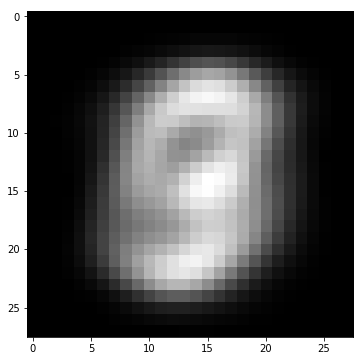

In [2]:
avg_im = []
for ar in X:
    avg_im.append(ar)

avg_im = np.mean(avg_im, axis=0)
np_splitted = np.array(np.split(avg_im, 28))

plt.figure(figsize=(15, 6))
res = plt.imshow(np_splitted, cmap=plt.cm.gray)
plt.show()

In [3]:
# вычислить матрицу выборочной ковариации (сигма). Какого она размера?

In [4]:
from scipy.linalg import svd

cov_mat = np.cov(np_splitted.T)
U, S, Vt = svd(np_splitted)

print(cov_mat.shape)

(28, 28)


In [5]:
# вычислить собственные векторы и собственные числа матрицы сигма. 
# Упорядочить их так, чтобы они располагались в порядке невозрастания собственных чисел,
# а собственные векторы были расположены по столбцу

In [6]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_all = []
for i in range(len(eig_vals)):
    eig_all.append([eig_vals[i], eig_vecs[i]])
eig_all.sort(reverse=True)
print(eig_all[0])

dec_eig_vecs = []
for i in range(len(eig_vals)):
    dec_eig_vecs.append(eig_all[i][1])
dec_eig_vecs = np.array(dec_eig_vecs)

[22850.451438553126, array([ -6.46429274e-06,   3.29099644e-05,  -8.21477872e-05,
         8.32817500e-05,  -1.08792819e-05,  -1.20784515e-04,
        -1.01435078e-03,  -8.73414241e-04,  -2.03935333e-03,
        -1.06085781e-03,   4.02848379e-03,   1.24393750e-03,
         2.84313322e-03,   8.60048258e-04,  -3.06942024e-03,
        -5.47298839e-03,  -4.95903861e-03,  -9.96802996e-03,
        -1.23477715e-02,   1.57244323e-02,  -4.74943558e-02,
         6.08748670e-02,  -3.87449630e-02,   4.63520663e-02,
         1.28734629e-01,   7.42776887e-03,  -9.67073634e-01,
        -1.94816823e-01])]


In [7]:
# по графику кумулятивной суммы собственных чисел дать рекомендации по выбору размерности (0.9; 0.95; 0.99).

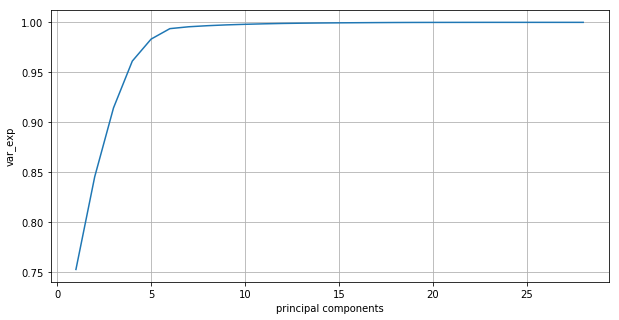

recommended dimensions: [2, 3, 5]


In [8]:
var_exp = [(i / sum(S)) for i in sorted(S, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
dimension=[0, 0, 0]
for i in range(len(cum_var_exp)):
    if (0.90 <= cum_var_exp[i] and not dimension[0]):
        dimension[0] = i
    elif (0.95 <= cum_var_exp[i] and not dimension[1]):
        dimension[1] = i
    elif (0.99 <= cum_var_exp[i] and not dimension[2]):
        dimension[2] = i

plt.figure(figsize=(10, 5))
plt.plot([i for i in range(1, 29)], cum_var_exp)
plt.xlabel('principal components')
plt.ylabel('var_exp')
plt.grid()
plt.show()
    
print("recommended dimensions:", dimension)

In [9]:
# нарисовать проекции нескольких цифр на аффинные пространства рекомендованной размерности. 
# Нарисовать проекции на пространства меньшей и большей размерности

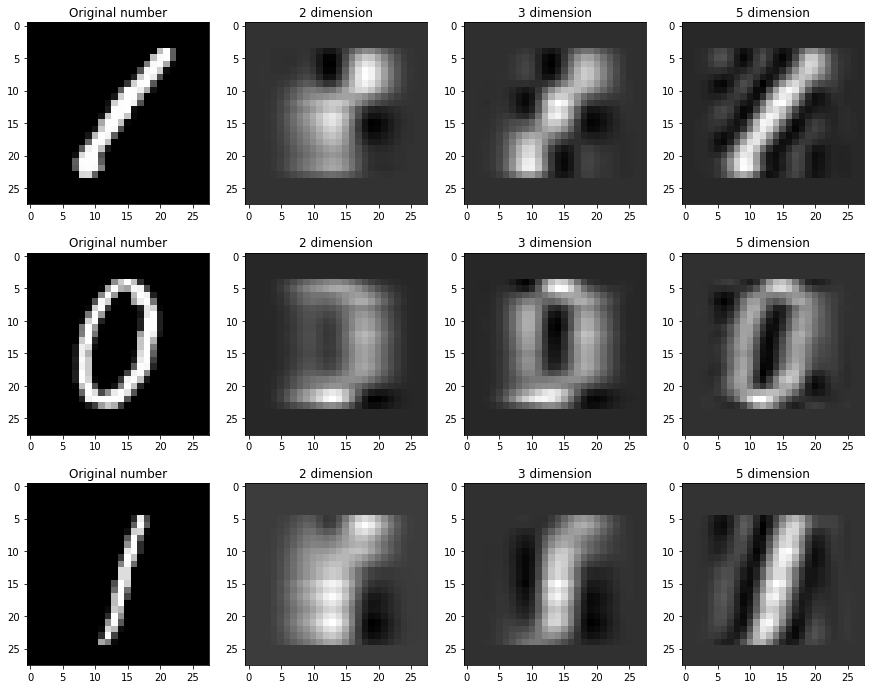

In [27]:
cov_matrix = np.cov(np_splitted.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

eig_values = np.array(eig_values)[np.argsort(eig_values)[::-1]]
eig_vectors = np.array(eig_vectors)[np.argsort(eig_values)[::-1]]

candidates=[0, 5, 15]
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
for i in range(len(candidates)):
    for d in range(len(dimension)):
        blur_img = np.dot(np.dot(eig_vectors[:,:dimension[d]].T,  X[candidates[i]].reshape(28, 28).T).T, eig_vectors[:,:dimension[d]].T)
        ax[i, 0].imshow(np.reshape(X[candidates[i]], (28, 28)), cmap=plt.cm.gray)
        ax[i, 0].set_title('Original number')
        ax[i, d + 1].imshow(blur_img.reshape(28, 28), cmap=plt.cm.gray)
        ax[i, d + 1].set_title('{0} dimension'.format(dimension[d]))

In [ ]:
# Применить решающие деревья к выборке меньшей размерности (признаки --- главные координаты)
# Как изменилось качество?

In [102]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from scipy.linalg import svd
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as DTC

train_df = pd.read_csv('train.csv')

X = np.array(train_df.drop(['label'], 1))
y = np.array(train_df['label'])

In [103]:
dimension = [2, 3, 5]
mean_errors = []
for d in dimension:
    X_temp = []
    for i in range(len(X[:1000])):
        U_i, S_i, Vt_i = svd(np.reshape(X[i], (28, 28)))
        img_mat = (S_i[:d] * U_i[:,:d]).dot(Vt_i[:d]).reshape(28 * 28)
        X_temp.append(img_mat)
    dtc = DTC(criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=3)
    score = cvs(dtc, X_temp, y[:1000], cv=10)
    mean_errors.append(1 - score.mean())
print(mean_errors)

[0.35741079392762054, 0.34767161488491194, 0.35037650899821549]


.Получили, что ошибка увеличилась незначительно (с 0.33 до 0.35)